Assignment No.1:k-nearest neighbors


Before running this block, make sure to upload "data.mat" in the google drive.

In [ ]:
#Enter your path of dataset from google drive
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/ML/"

dataset = path + "data.mat"

#Enter path of your test image
test_image=path+"notme.png"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [ ]:
import numpy as np
images= np.transpose(images)
print(images.shape)
im = np.reshape(images, [ 32, 32, 3, -1], order="F")
print("Reshaped dim:", im.shape)

(3072, 50)
Reshaped dim: (32, 32, 3, 50)


(3072, 50)
Reshaped dim: (32, 32, 3, 50)
(32, 32, 3)


(32, 32, 3)

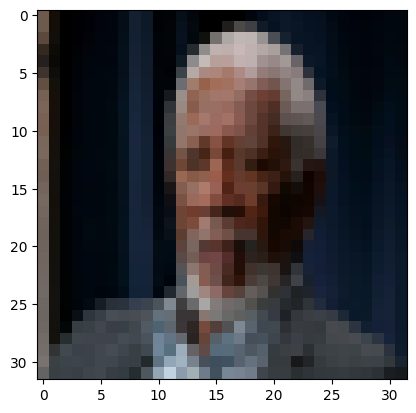

In [ ]:
import numpy as np
images= np.transpose(images)
print(images.shape)
im = np.reshape(images, [ 32, 32, 3, -1], order="F")
print("Reshaped dim:", im.shape)
from matplotlib import pyplot as plt
#import cv2

plt.imshow(im[:,:,:,1])
print(im[:,:,:,0].shape)
a= im[:,:,:,1]
plt.imshow(a)
a.shape

You Need to write your code in this block.

In [ ]:
#from scipy import misc
import cv2
import numpy as np


from math import sqrt
from numpy import ndarray
from google.colab.patches import cv2_imshow



for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")
print("each dataset image dimension:", G.shape)



each dataset image dimension: (3072,)


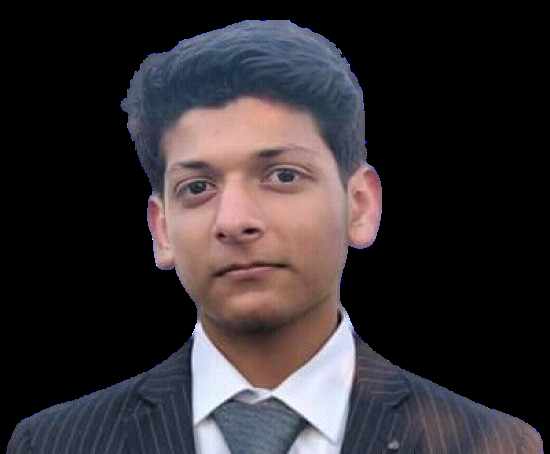

Original dim: (454, 550, 3)


In [ ]:
##############################


# read image
image = cv2.imread(test_image)

# display image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Original dim:", image.shape)

##############################




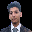

Resized dim: (32, 32, 3)


In [ ]:



    #Resize your image
####### Your code here #######


# resize image
resized_image=cv2.resize(image,(32,32))

# display resized image
cv2_imshow(resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Resized dim:", resized_image.shape)

##############################



In [ ]:


##############################

    #Reshape your image as we reshape the image of dataset
####### Your code here #######

# reshape image
# reshaped_image= np.transpose(resized_image)

reshaped_image= np.reshape(resized_image,[-1], order="F")
print("Reshaped dim:", reshaped_image.shape)

#############################




Reshaped dim: (3072,)


In [ ]:
#Calculate Eucleadian distance between your image and dataset
####### Your code here #######
print(images.shape)
print(reshaped_image.shape)

distances = np.zeros((50,))

for i in range(images.shape[1]):
    squared_diff = (reshaped_image - images[:, i]) ** 2 # this line was not indented
    sum_squared_diff = np.sum(squared_diff) # this line was not indented
    distances[i] = np.sqrt(sum_squared_diff) # this line was not indented

# distances now contains the Euclidean distances to each of the 50 images
print(distances)

##############################

# distances.sort()
# print("sorted: ", distances)

##############################

(3072, 50)
(3072,)
[540.09628771 536.72711875 590.24401734 589.88049637 604.5949057
 454.24552832 567.81775245 606.79650625 569.9035006  571.40616027
 573.08463598 587.59765146 569.46466089 567.10581023 567.41695428
 570.39460025 574.81823214 581.4344331  581.85651152 573.96602687
 579.83359682 559.22088659 438.10272768 573.44049386 507.25043125
 552.91500251 567.44162695 572.8874235  598.34772499 548.01916025
 571.34840509 545.08164526 533.58410771 572.04283056 573.00436299
 585.37765588 587.02981185 582.81472185 564.59100241 550.18178814
 557.74546166 561.05079984 556.94793293 590.04491354 570.75125931
 508.17024706 579.34014189 578.95595687 574.49369013 572.01398584]


In this Block you need to fill the code for 1-NN.

In [ ]:
# Write code for 1 NN
#Find min distance
#Fine at which point min value exists

####### Your code here #######
min_distance = min(distances)
print("distance:", min_distance)
min_index = np.argmin(distances)
print("index of minimum distance:", min_index)

name = label[min_index]
print(f'Celebrity look-alike: {name}')

##############################

distance: 438.102727679251
index of minimum distance: 22
Celebrity look-alike: [array(['meryl streep'], dtype='<U12')]



Write code for 3 NN


In [ ]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop

####### Your code here #######
distances_copy = distances.copy()

min_distances = []
min_indices = []
names = []
for i in range(3):
  min_distance = min(distances_copy)
  min_index = np.argmin(distances_copy)
  min_distances.append(min_distance)
  min_indices.append(min_index)
  distances_copy = np.delete(distances_copy, min_index)
  names.append(label[min_index][0])

  print(f"{i+1} : Index: {min_indices[i]}, Distance: {min_distances[i]}")
  name = label[min_indices[i]][0]
  print("celebrity look alike: ", name)



##############################

1 : Index: 22, Distance: 438.102727679251
celebrity look alike:  ['meryl streep']
2 : Index: 5, Distance: 454.2455283214134
celebrity look alike:  ['ahsan khan']
3 : Index: 22, Distance: 507.25043124673635
celebrity look alike:  ['meryl streep']


Write code for 5 NN

In [ ]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances

####### Your code here #######
distances_copy = distances.copy()

min_distances = []
min_indices = []
names = []
for i in range(5):
  min_distance = min(distances_copy)
  min_index = np.argmin(distances_copy)
  min_distances.append(min_distance)
  min_indices.append(min_index)
  distances_copy = np.delete(distances_copy, min_index)
  names.append(label[min_index][0])

  print(f"{i+1} : Index: {min_indices[i]}, Distance: {min_distances[i]}")
  name = label[min_indices[i]][0]
  print("celebrity look alike: ", name)





##############################

1 : Index: 22, Distance: 438.102727679251
celebrity look alike:  ['meryl streep']
2 : Index: 5, Distance: 454.2455283214134
celebrity look alike:  ['ahsan khan']
3 : Index: 22, Distance: 507.25043124673635
celebrity look alike:  ['meryl streep']
4 : Index: 42, Distance: 508.1702470629307
celebrity look alike:  ['fawad khan']
5 : Index: 29, Distance: 533.5841077093658
celebrity look alike:  ['bilawal bhutto']
